# Rolling grants, competitive funding, or awards?
*Collective Compass Project, DJA, 10 March 2023*

Chiel van Heerwaarden and Linnet Taylor

---

This notebook contains a preliminary analysis on the preference for rolling grants, competitive funding, and awards per science field (beta / economy / humanities).

---
## Loading the necessary Python modules.

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import requests
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

plt.rcParams.update({'font.size': 12}) # must set in top
plt.rcParams.update({'figure.figsize': (12, 4)}) # must set in top

---
## Download the data

In [2]:
# download a fresh copy of the dataset from the OSF
data_url = 'https://osf.io/f76rb//?action=download'
response = requests.get(data_url)

if response.status_code == 200:
   with open('../data/dat.csv', 'wb') as f:
       f.write(response.content)

In [3]:
df = pd.read_csv('../data/dat.csv')

---
# Preliminary analysis on the distribution of fields and career levels over the institutions 

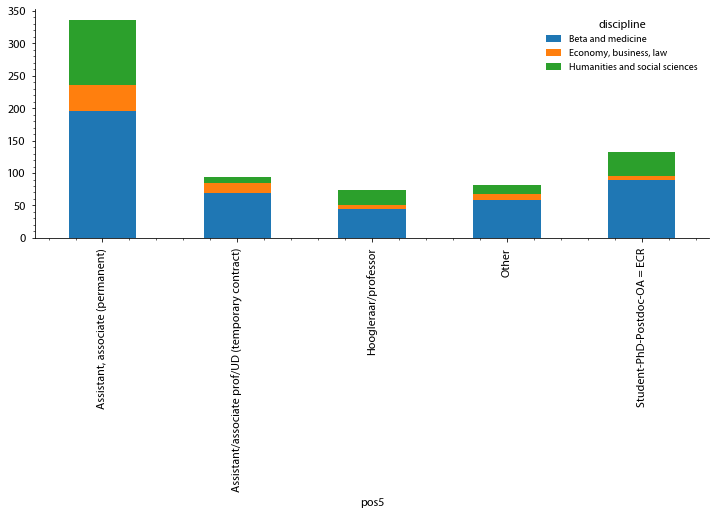

In [4]:
df_vals = df[['discipline', 'pos5']].value_counts()
df_vals.unstack('discipline').plot.bar(stacked=True);

We began by looking at the distribution of the data. Because we wanted to test a hypothesis that early career researchers would feel differently about funding configurations from later-career researchers, we checked the comparative representation of each disciplinary cluster across different career levels. As can be seen from the figure above, beta/medicine researchers are over-represented in the responses at each career level. This is roughly the inverse to the actual distribution of research staff in Dutch universities. 

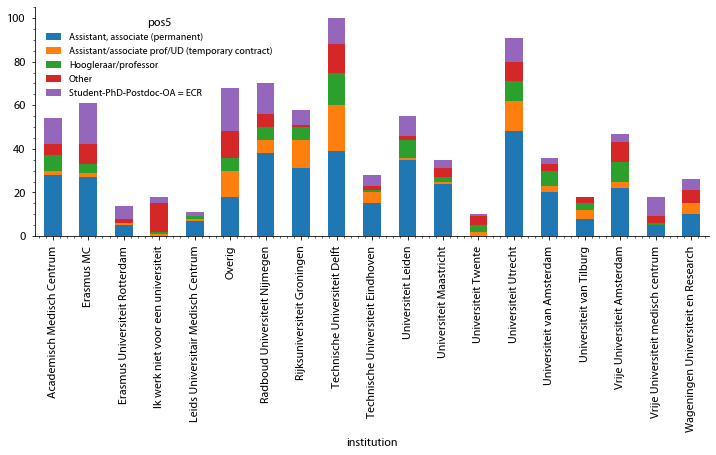

In [5]:
df_vals = df[['institution', 'pos5']].value_counts()
df_vals.unstack('pos5').plot.bar(stacked=True);

Next, we looked at career stage by institution (figure above), to check whether the data over- or under-represented researchers in particular institutional environments. We can see that permanent staff (blue and green bars) are over-represented as a proportion of the responses at most of the universities, given that these respondents actually constitute a minority of those present in the universities.

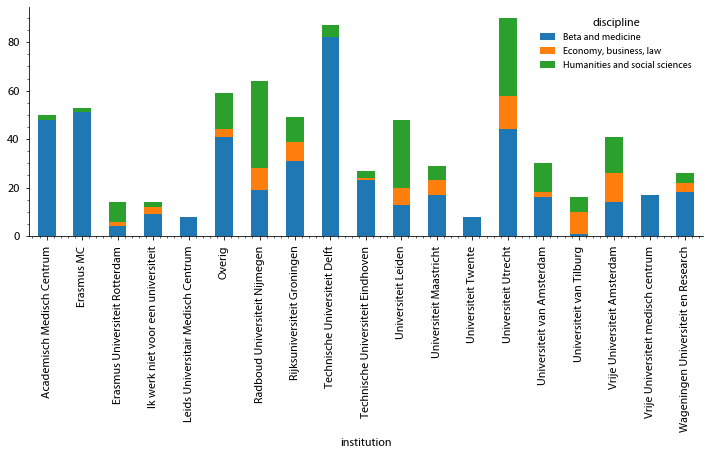

In [6]:
df_vals = df[['institution', 'discipline']].value_counts()
df_vals.unstack('discipline').plot.bar(stacked=True);

Finally, we looked at how the disciplines were represented across universities in the responses (figure above). Here, we find that the comparative distribution of our three disciplinary groups in the responses (though the over-representation of beta in the responses persists) roughly aligns with the disciplinary composition of the different institutions represented, i.e. there were social science and econ/law/business responses from universities where these are present. Universiteit Twente is an exception, with only beta researchers represented in the responses although the university has other disciplines present.

---
# Division between rolling, competition, and awards

The analyses below are **very preliminary** and subject to changes.

In [7]:
mask = df.columns.str.contains('funds_available|discipline|pos5|kt_funds_*')
df_kt = df.iloc[:, mask].copy()
df_kt = df_kt.dropna()

# CvH: I readded the normalization to allow the notebook to produce correct results at a "Run all"
for col in df_kt.iloc[:, df_kt.columns.str.contains('kt_funds*')]:
    df_kt.loc[:, col] /= df_kt.loc[:, 'funds_available']

In [8]:
# Convert to percentages
kts = list( df_kt.iloc[:, df_kt.columns.str.contains('kt_funds*')] )
average_fraction_spent = df_kt.groupby('discipline')[kts].mean() * 100

Text(0, 0.5, 'Percentage van totaal budget')

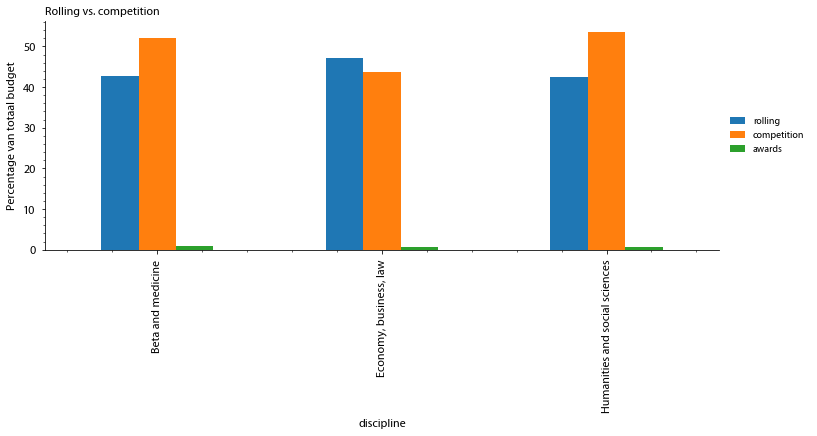

In [9]:
rolling_vs_competition = pd.DataFrame()
rolling_vs_competition['rolling'] = average_fraction_spent['kt_funds_rolling_ecr'] + average_fraction_spent['kt_funds_rolling_senior']
rolling_vs_competition['competition'] = \
    average_fraction_spent['kt_funds_first_ecr'] \
    + average_fraction_spent['kt_funds_personal_ecr'] \
    + average_fraction_spent['kt_funds_personal_senior'] \
    + average_fraction_spent['kt_funds_small_first'] \
    + average_fraction_spent['kt_funds_small_second'] \
    + average_fraction_spent['kt_funds_team'] \
    + average_fraction_spent['kt_funds_thematic'] \
    + average_fraction_spent['kt_funds_thematic_co']
rolling_vs_competition['awards'] = average_fraction_spent['kt_funds_award']

rolling_vs_competition.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
locs, labels = plt.xticks()
#plt.xticks(locs, ['medium','low','high'])
plt.title('Rolling vs. competition')
plt.ylabel('Percentage van totaal budget')

This analysis shows that beta and humanities show similar preference in competitive money over rolling grants, while economy prefers the other way around.

---

In [10]:
mask = df.columns.str.contains('funds_available|discipline|pos5|kt_funds_*')
df_kt = df.iloc[:, mask].copy()
df_kt = df_kt.dropna()

# CvH: I readded the normalization to allow the notebook to produce correct results at a "Run all"
for col in df_kt.iloc[:, df_kt.columns.str.contains('kt_funds*')]:
    df_kt.loc[:, col] /= df_kt.loc[:, 'funds_available']

In [11]:
# Convert to percentages
average_fraction_spent = df_kt.groupby(['pos5', 'discipline'])[kts].mean() * 100

Text(0, 0.5, 'Percentage van totaal budget')

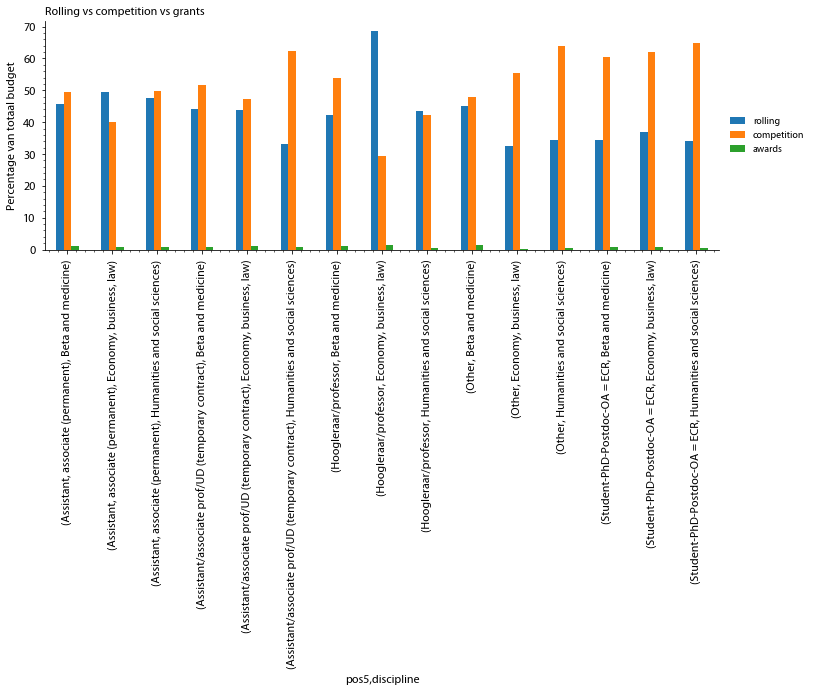

In [12]:
rolling_vs_competition = pd.DataFrame()
rolling_vs_competition['rolling'] = average_fraction_spent['kt_funds_rolling_ecr'] + average_fraction_spent['kt_funds_rolling_senior']
rolling_vs_competition['competition'] = \
    average_fraction_spent['kt_funds_first_ecr'] \
    + average_fraction_spent['kt_funds_personal_ecr'] \
    + average_fraction_spent['kt_funds_personal_senior'] \
    + average_fraction_spent['kt_funds_small_first'] \
    + average_fraction_spent['kt_funds_small_second'] \
    + average_fraction_spent['kt_funds_team'] \
    + average_fraction_spent['kt_funds_thematic'] \
    + average_fraction_spent['kt_funds_thematic_co']
rolling_vs_competition['awards'] = average_fraction_spent['kt_funds_award']

rolling_vs_competition.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
locs, labels = plt.xticks()
#plt.xticks(locs, ['medium','low','high'])
plt.title('Rolling vs competition vs grants')
plt.ylabel('Percentage van totaal budget')

In [13]:
df_new = df.copy()
df_new.loc[ df_new['pos5'] == 'Hoogleraar/professor', 'pos5'] = "permanent"
df_new.loc[ df_new['pos5'] == 'Assistant, associate (permanent)', 'pos5' ] = "permanent"
df_new.loc[ df_new['pos5'] == 'Assistant/associate prof/UD (temporary contract)', 'pos5' ] = "temporary"
df_new.loc[ df_new['pos5'] == 'Student-PhD-Postdoc-OA = ECR', 'pos5' ] = "temporary"
df_new.loc[ df_new['pos5'] == 'Other', 'pos5' ] = "temporary"

In [14]:
mask = df_new.columns.str.contains('funds_available|discipline|pos5|kt_funds_*')
df_kt = df_new.iloc[:, mask].copy()
df_kt = df_kt.dropna()

# CvH: I readded the normalization to allow the notebook to produce correct results at a "Run all"
for col in df_kt.iloc[:, df_kt.columns.str.contains('kt_funds*')]:
    df_kt.loc[:, col] /= df_kt.loc[:, 'funds_available']

In [15]:
# Convert to percentages
average_fraction_spent = df_kt.groupby(['pos5', 'discipline'])[kts].mean() * 100

Text(0, 0.5, 'Percentage van totaal budget')

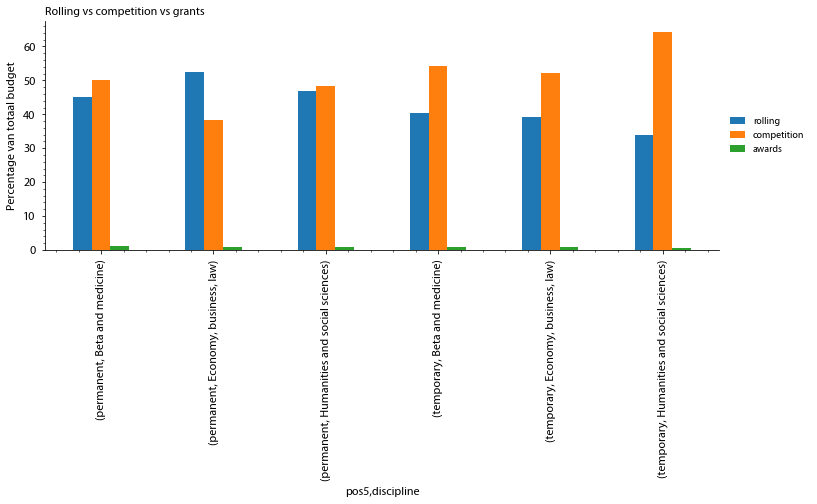

In [16]:
rolling_vs_competition = pd.DataFrame()
rolling_vs_competition['rolling'] = average_fraction_spent['kt_funds_rolling_ecr'] + average_fraction_spent['kt_funds_rolling_senior']
rolling_vs_competition['competition'] = \
    average_fraction_spent['kt_funds_first_ecr'] \
    + average_fraction_spent['kt_funds_personal_ecr'] \
    + average_fraction_spent['kt_funds_personal_senior'] \
    + average_fraction_spent['kt_funds_small_first'] \
    + average_fraction_spent['kt_funds_small_second'] \
    + average_fraction_spent['kt_funds_team'] \
    + average_fraction_spent['kt_funds_thematic'] \
    + average_fraction_spent['kt_funds_thematic_co']
rolling_vs_competition['awards'] = average_fraction_spent['kt_funds_award']

rolling_vs_competition.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
locs, labels = plt.xticks()
#plt.xticks(locs, ['medium','low','high'])
plt.title('Rolling vs competition vs grants')
plt.ylabel('Percentage van totaal budget')

This analysis shows people on temporary contracts are the group that largely prefers competition. This can be either because they don't have access to the rolling grants, or because they have not been disappointed yet by the system.

In [17]:
mask = df.columns.str.contains('funds_available|discipline|pos5|kt_funds_*')
df_kt = df.iloc[:, mask].copy()
df_kt = df_kt.dropna()

# CvH: I readded the normalization to allow the notebook to produce correct results at a "Run all"
for col in df_kt.iloc[:, df_kt.columns.str.contains('kt_funds*')]:
    df_kt.loc[:, col] /= df_kt.loc[:, 'funds_available']

In [18]:
# Convert to percentages
kts = list( df_kt.iloc[:, df_kt.columns.str.contains('kt_funds*')] )
average_fraction_spent = df_kt.groupby('pos5')[kts].mean() * 100

Text(0, 0.5, 'Percentage van totaal budget')

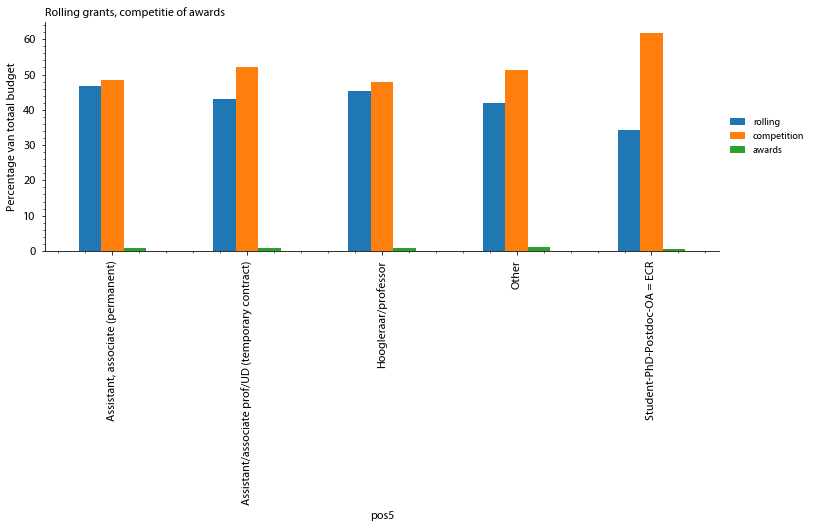

In [19]:
rolling_vs_competition = pd.DataFrame()
rolling_vs_competition['rolling'] = average_fraction_spent['kt_funds_rolling_ecr'] + average_fraction_spent['kt_funds_rolling_senior']
rolling_vs_competition['competition'] = \
    average_fraction_spent['kt_funds_first_ecr'] \
    + average_fraction_spent['kt_funds_personal_ecr'] \
    + average_fraction_spent['kt_funds_personal_senior'] \
    + average_fraction_spent['kt_funds_small_first'] \
    + average_fraction_spent['kt_funds_small_second'] \
    + average_fraction_spent['kt_funds_team'] \
    + average_fraction_spent['kt_funds_thematic'] \
    + average_fraction_spent['kt_funds_thematic_co']
rolling_vs_competition['awards'] = average_fraction_spent['kt_funds_award']

rolling_vs_competition.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
locs, labels = plt.xticks()
#plt.xticks(locs, ['medium','low','high'])
plt.title('Rolling grants, competitie of awards')
plt.ylabel('Percentage van totaal budget')

# PCA analysis
## PCA computation to be compared to Caspar's analysis

In [150]:
# mask = df.columns.str.contains('funds_available|discipline|pos5|kt_funds_*')
mask = df.columns.str.contains('funds_available|kt_funds_*')
df_kt = df.iloc[:, mask].copy()
df_kt = df_kt.dropna()

# CvH: I readded the normalization to allow the notebook to produce correct results at a "Run all"
for col in df_kt.iloc[:, df_kt.columns.str.contains('kt_funds*')]:
    df_kt.loc[:, col] /= df_kt.loc[:, 'funds_available']
    
mask = df_kt.columns.str.contains('kt_funds_*')
df_kt = df_kt.iloc[:, mask].copy()

In [174]:
# subtract mean and divide by standard deviation
sc = StandardScaler()
df_normalized = sc.fit_transform(df_kt)

# Do not scale the data as all variables are in the same units.
#df_normalized = df_kt.copy()

n_components = 11
pca = PCA(n_components=n_components)
# pca = FactorAnalysis(rotation="varimax", n_components=n_components)
df_normalized = pca.fit_transform(df_normalized)

In [152]:
# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns = [ 'PC%s' % _ for _ in range(n_components) ],
index = df_kt.columns)
loadings

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
kt_funds_personal_senior,0.360961,-0.263191,0.471720,-0.072409,-0.127627,-0.019994,-0.066373,-0.226266,0.197840,-0.586745,-0.342014
kt_funds_team,0.390067,-0.277543,0.085266,0.030610,-0.310461,-0.264697,-0.066226,-0.382865,-0.253964,0.613507,-0.065568
kt_funds_personal_ecr,0.264353,0.297610,0.271481,-0.057238,-0.397887,0.471971,-0.173856,0.456605,0.235592,0.289969,-0.072097
kt_funds_thematic,0.295409,-0.241137,-0.461007,0.134007,0.026203,-0.376115,-0.128875,0.566457,0.091544,-0.050113,-0.365482
kt_funds_thematic_co,0.291105,0.003518,-0.460838,0.044473,0.297893,0.614415,0.011852,-0.350336,0.012218,0.046520,-0.330848
kt_funds_small_first,-0.044535,0.497749,-0.182657,-0.413690,-0.149735,-0.190152,-0.550095,-0.160050,-0.298827,-0.163410,-0.207268
kt_funds_small_second,0.237682,0.290320,0.055340,-0.527370,0.151249,-0.182155,0.684139,0.086056,-0.035552,0.088969,-0.193270
kt_funds_award,0.173494,0.065013,0.410317,0.005538,0.769913,-0.094775,-0.358479,0.113477,-0.027522,0.231059,-0.001755
kt_funds_first_ecr,-0.047525,0.462183,0.174177,0.690196,-0.038292,-0.109520,0.203345,-0.038583,-0.258338,-0.036846,-0.391185
kt_funds_rolling_ecr,-0.510266,-0.038162,0.046676,-0.095655,0.004370,-0.126761,-0.051881,-0.176743,0.564405,0.316407,-0.508094


In [163]:
# Correlations between original variables and PCA
loadings = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_),
columns = [ 'PC%s' % _ for _ in range(n_components) ],
index = df_kt.columns)
loadings

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
kt_funds_personal_senior,0.538305,-0.320974,0.518239,-0.073539,-0.125086,-0.018692,-0.060022,-0.199343,0.159989,-0.451876,-0.212275
kt_funds_team,0.581712,-0.338478,0.093674,0.031088,-0.304280,-0.247462,-0.059889,-0.337307,-0.205376,0.472486,-0.040696
kt_funds_personal_ecr,0.394232,0.362949,0.298253,-0.058131,-0.389965,0.441239,-0.157222,0.402273,0.190518,0.223317,-0.044748
kt_funds_thematic,0.440547,-0.294079,-0.506470,0.136098,0.025681,-0.351624,-0.116544,0.499054,0.074030,-0.038594,-0.226841
kt_funds_thematic_co,0.434128,0.004290,-0.506284,0.045167,0.291962,0.574408,0.010718,-0.308649,0.009881,0.035827,-0.205345
kt_funds_small_first,-0.066415,0.607029,-0.200670,-0.420146,-0.146754,-0.177770,-0.497463,-0.141005,-0.241656,-0.125849,-0.128643
kt_funds_small_second,0.354458,0.354059,0.060797,-0.535599,0.148237,-0.170294,0.618682,0.075816,-0.028750,0.068519,-0.119955
kt_funds_award,0.258734,0.079286,0.450781,0.005624,0.754583,-0.088604,-0.324181,0.099975,-0.022256,0.177948,-0.001089
kt_funds_first_ecr,-0.070875,0.563655,0.191354,0.700967,-0.037530,-0.102388,0.183890,-0.033992,-0.208912,-0.028377,-0.242794
kt_funds_rolling_ecr,-0.760966,-0.046540,0.051279,-0.097148,0.004283,-0.118507,-0.046917,-0.155712,0.456423,0.243677,-0.315355


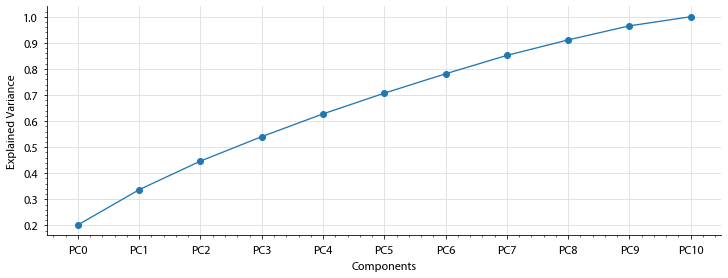

In [164]:
plt.figure()
plt.plot(loadings.columns, pca.explained_variance_ratio_.cumsum(), 'C0-o')
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.grid()
plt.show()

The principal component analysis follows the ideas of Caspar van Lissa and Ahmed Mahfouz to find the type of people that are ortogonal to each other. Unlike Caspar, I did not apply any (varimax) rotation. The first PC consists of a person that mainly likes rolling grants. The second PC is the group that prefers funding starters instead of seniors. I am not certain about my interpretation due to lack of experience with PCA.

---

## Reproduction results Caspar
The procedure below follows Caspar's analysis, using a PCA with rotation identical to the R `psych` package. I have compared the coefficients with Caspar's and they are identical, as long as I normalize

In [178]:
df_normalized2 = df_kt.copy()

n_factors = 11

fa = FactorAnalyzer(rotation=None, n_factors=n_factors, method='principal', svd_method='lapack')
fa.fit(df_normalized2)

loadings2 = pd.DataFrame(fa.loadings_, index=df_normalized2.columns, columns=[f"factor{i+1}" for i in range(n_factors)])
rotated_factor_pattern = loadings2#[abs(loadings2) >= 0.4].dropna(how='all')

# display the results
rotated_factor_pattern

,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11
kt_funds_personal_senior,0.538046,-0.320820,0.517990,0.073504,-0.125026,-0.018683,0.059993,-0.199247,-0.159912,-0.451659,0.212173
kt_funds_team,0.581432,-0.338315,0.093629,-0.031073,-0.304133,-0.247343,0.059861,-0.337145,0.205277,0.472259,0.040676
kt_funds_personal_ecr,0.394043,0.362775,0.298110,0.058103,-0.389777,0.441027,0.157146,0.402080,-0.190427,0.223209,0.044726
kt_funds_thematic,0.440335,-0.293938,-0.506227,-0.136033,0.025669,-0.351456,0.116488,0.498814,-0.073994,-0.038575,0.226732
kt_funds_thematic_co,0.433919,0.004288,-0.506041,-0.045145,0.291822,0.574132,-0.010713,-0.308501,-0.009876,0.035810,0.205247
kt_funds_small_first,-0.066383,0.606737,-0.200573,0.419944,-0.146683,-0.177685,0.497224,-0.140938,0.241539,-0.125788,0.128582
kt_funds_small_second,0.354288,0.353889,0.060768,0.535342,0.148166,-0.170212,-0.618385,0.075779,0.028737,0.068486,0.119898
kt_funds_award,0.258610,0.079248,0.450564,-0.005622,0.754221,-0.088561,0.324025,0.099927,0.022246,0.177863,0.001089
kt_funds_first_ecr,-0.070841,0.563384,0.191262,-0.700630,-0.037512,-0.102339,-0.183801,-0.033975,0.208812,-0.028363,0.242677
kt_funds_rolling_ecr,-0.760600,-0.046518,0.051254,0.097102,0.004281,-0.118451,0.046894,-0.155637,-0.456204,0.243560,0.315204


In [179]:
# This is Caspar's outcome.
df_normalized2 = df_kt.copy()

n_factors = 3

fa = FactorAnalyzer(rotation="varimax", n_factors=n_factors, method='principal')
fa.fit(df_normalized2)

loadings2 = pd.DataFrame(fa.loadings_, index=df_normalized2.columns, columns=[f"factor{i+1}" for i in range(n_factors)])
rotated_factor_pattern = loadings2#[abs(loadings2) >= 0.4].dropna(how='all')

# display the results
rotated_factor_pattern

,factor1,factor2,factor3
kt_funds_personal_senior,0.037713,0.008974,0.811930
kt_funds_team,0.380960,-0.031919,0.561371
kt_funds_personal_ecr,-0.051873,0.529453,0.304522
kt_funds_thematic,0.720929,-0.118457,0.052808
kt_funds_thematic_co,0.647284,0.143851,-0.068643
kt_funds_small_first,-0.036348,0.488756,-0.415407
kt_funds_small_second,0.099050,0.478861,0.123820
kt_funds_award,-0.184189,0.233088,0.433488
kt_funds_first_ecr,-0.316722,0.489469,-0.138234
kt_funds_rolling_ecr,-0.512040,-0.374796,-0.425026


Now I will follow the original method and rotate the data manually

In [184]:
from numpy import eye, asarray, dot, sum, diag
from numpy.linalg import svd
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)


# Reformat and view results
loadings = pd.DataFrame(varimax(pca.components_.T[:, :3] * np.sqrt(pca.explained_variance_)),
columns = [ 'PC%s' % _ for _ in range(3) ],
index = df_kt.columns)
loadings



ValueError: operands could not be broadcast together with shapes (11,3) (11,) 